In [1]:
import re
import nltk
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from string import digits
from math import log10
from autocorrect import spell

In [2]:
wiki_file = open('Desktop/abstracts_wiki.txt','r')
data = []
for text in wiki_file.readlines():
    data.append(text)

In [3]:
len(data)

3484525

In [4]:
data[:3]

["Anarchism is a political philosophy that advocates self-governed societies based on voluntary institutions. These are often described as stateless societies,&quot;ANARCHISM, a social philosophy that rejects authoritarian government and maintains that voluntary institutions are best suited to express man's natural social tendencies.\n",
 'Albedo () is a measure for reflectance or optical brightness (Latin albedo, &quot;whiteness&quot;) of a surface. It is dimensionless and measured on a scale from zero (corresponding to a black body that absorbs all incident radiation) to one (corresponding to a white body that reflects all incident radiation).\n',
 "A (named , plural As, A's, as, a's or aes}}) is the first letter and the first vowel of the ISO basic Latin alphabet. It is similar to the Ancient Greek letter alpha, from which it derives.\n"]

In [5]:
#Create tokenizer of RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
stops = set(stopwords.words("english"))
stop_word = 'quot'

# Create porter_stemmer of class PorterStemmer
porter_stemmer = PorterStemmer()

    
# list for preprocessed wordss in loop
preprocessed_words = []

# loop through document list
for i in data[:18]: #18 is the maximum number of sentences can be ran in the author's PC
    
    # clean and tokenize document string
    raw = i.lower()
    
    # tokenize document string into words
    tokens = tokenizer.tokenize(raw)
    
    # stem words
    stemmed_words = [porter_stemmer.stem(i) for i in tokens]
  
    # remove stop words from tokens
    meaningful_words = [i for i in stemmed_words if not i in stops]
    
    for word in meaningful_words:
        preprocessed_words.append(word)

preprocessed_words

[u'anarch',
 u'polit',
 u'philosophi',
 u'advoc',
 'self',
 u'govern',
 u'societi',
 u'base',
 u'voluntari',
 u'institut',
 'often',
 u'describ',
 u'stateless',
 u'societi',
 'quot',
 u'anarch',
 'social',
 u'philosophi',
 u'reject',
 'authoritarian',
 u'govern',
 u'maintain',
 u'voluntari',
 u'institut',
 'best',
 u'suit',
 u'express',
 'man',
 u'natur',
 'social',
 u'tendenc',
 'albedo',
 u'measur',
 u'reflect',
 u'optic',
 u'bright',
 'latin',
 'albedo',
 'quot',
 u'white',
 'quot',
 u'surfac',
 u'dimensionless',
 u'measur',
 'scale',
 'zero',
 u'correspond',
 'black',
 u'bodi',
 u'absorb',
 u'incid',
 u'radiat',
 'one',
 u'correspond',
 'white',
 u'bodi',
 u'reflect',
 u'incid',
 u'radiat',
 u'name',
 'plural',
 u'ae',
 'first',
 'letter',
 'first',
 'vowel',
 'iso',
 'basic',
 'latin',
 'alphabet',
 'similar',
 'ancient',
 'greek',
 'letter',
 'alpha',
 u'deriv',
 'greek',
 u'mytholog',
 u'achil',
 u'wa',
 'greek',
 'hero',
 'trojan',
 'war',
 'central',
 u'charact',
 'greatest',


In [6]:
%%time
print 'Number of words successfuly written :', len(preprocessed_words), 'words'

USE_PREMADE_REVIEWS_TEXT = False

from os import path
words_filepath = 'Desktop/abstracts.wiki.preprocessed.txt'
if not USE_PREMADE_REVIEWS_TEXT:
    with open(words_filepath, 'w') as f:
        for words in preprocessed_words:
            # if the row lacks a word, skip it.
            if pd.isnull(words):
                continue
            f.write(words + '\n')
else:
    assert path.exists(words_filepath)

Number of words successfuly written : 359 words
Wall time: 186 ms


### Zipf's Law

In [9]:
#Zipf's Law using data from abstracts.wiki ()
text = []
for i in data[:1001]:
    
    # tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    
    for token in tokens:
        text.append(token)

from operator import itemgetter
    
frequency ={}
for word in text:
    count = frequency.get(word,0)
    frequency[word] = count + 1
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
      print key, value

the 1661
of 1262
a 791
is 652
and 640
in 630
to 457
or 367
quot 331
an 287
as 252
by 215
was 203
from 187
that 184
for 152
it 140
with 129
are 118
may 110
on 108
also 98
which 96
s 96
refer 76
known 71
greek 70
used 69
thumb 69
one 65
� 64
events 58
� 56
be 56
its 55
at 55
his 52
i 50
who 48
first 45
other 42
he 42
called 41
name 39
number 39
american 38
this 38
century 37
group 37
has 37
word 35
right 35
have 34
most 34
but 33
two 33
king 32
term 32
� 32
all 31
their 30
some 30
after 30
united 29
any 29
been 29
system 29
more 29
such 29
often 29
ancient 28
can 28
english 27
latin 27
form 27
not 27
bc 27
states 26
meaning 25
book 25
aircraft 24
ii 24
alexander 24
between 24
� 24
when 23
computer 23
law 23
about 22
atomic 22
chemical 22
person 22
state 21
common 21
element 21
into 21
sometimes 21
son 21
usually 20
roman 20
c 20
several 20
language 20
life 20
different 19
were 19
french 19
based 19
mathematics 19
time 19
dictionary 18
art 18
1 18
field 18
modern 18
family 18
� 18
means 1

ppp 2
civil 2
presence 2
ice 2
amos 2
alboin 2
authorship 2
cultural 2
elf 2
eli 2
starting 2
aldine 2
greatest 2
numerical 2
craft 2
drugs 2
beer 2
players 2
irregular 2
mixture 2
stanza 2
radio 2
random 2
oriented 2
1962 2
isolated 2
1967 2
10th 2
abbahu 2
arraignment 2
classes 2
roles 2
took 2
serve 2
urban 2
too 2
merwara 2
fiction 2
top 2
restrict 2
rank 2
days 2
grasses 2
rain 2
associate 2
cassiopeia 2
carolingian 2
diseases 2
complexity 2
ionic 2
epirus 2
gate 2
phone 2
julia 2
establishment 2
causes 2
solemn 2
surrounding 2
venus 2
missionary 2
brackish 2
supported 2
facilities 2
8th 2
pupil 2
48 2
supreme 2
89 2
1183 2
variations 2
1185 2
dangerous 2
brand 2
560 2
1989 2
1988 2
legends 2
functional 2
actual 2
host 2
est 2
babbage 2
polynomial 2
dubai 2
altberlin 2
resolved 2
citizen 2
nicknamed 2
novels 2
twelfth 2
partner 2
almost 2
planets 2
appearance 2
climate 2
proposal 2
removal 2
aa 2
taking 2
animalia 2
astrobiology 2
exists 2
hydrocarbons 2
130 2
anthropic 2
abydos 2

lightweight 1
dual 1
ansible 1
adamic 1
motif 1
layer 1
medicinal 1
wild 1
unusually 1
wujcik 1
painter 1
improved 1
amalarico 1
thrusting 1
sufficient 1
gildas 1
739 1
agreements 1
735 1
arbitrator 1
730 1
amiga 1
rapcore 1
provinces 1
sequences 1
rpg 1
subscribe 1
unclear 1
tactical 1
arithmetic� 1
actaeus 1
ames 1
honorius 1
350px 1
ottoman 1
agencies 1
publishers 1
identification 1
nie� 1
cole 1
violet 1
acquired 1
requirement 1
available 1
ascertain 1
married 1
lossless 1
ones 1
999 1
monuments 1
chiyoda 1
postulates 1
fear 1
seaweed 1
longevity 1
chapters 1
agreed 1
prismatoids 1
oranienburger 1
statute 1
150� 1
class 1
akephalos 1
eldest 1
centre 1
caducous 1
agency 1
theoretic 1
rearranged 1
linked 1
nonpersonal 1
clio 1
disjoint 1
beter 1
creditors 1
sculpture 1
constituent 1
nonclassified 1
650 1
priority 1
eighth 1
publication 1
unger 1
eleventh 1
rudolf 1
restaurants 1
hence 1
conversation 1
compositions 1
philip 1
conflicts 1
nizamuddin 1
arithmos 1
archivers 1
maintains 1

infrastructure 1
25th 1
redox 1
lessening 1
500px 1
tacticus 1
mishnah 1
visible 1
feelings 1
visibly 1
julio 1
punishment 1
heracles 1
rehabilitative 1
changed 1
forum 1
voice 1
chapelain 1
algol68 1
ethanol 1
pata 1
hundreds 1
apollinarism 1
sterreich 1
specification 1
christ 1
naia 1
expressive 1
akbar 1
louder 1
methane 1
general� 1
lampsacus 1
amorphous 1
arboreal 1
risk 1
nai� 1
whatsoever 1
345 1
geraldo 1
dictionaryanti 1
rutales 1
sleep 1
amram 1
olympians 1
legacies 1
limited 1
cpu 1
polyhedrons 1
apostolorum 1
billion� 1
85 1
forestry 1
40 1
47 1
balas 1
talmud 1
zaire 1
shooting 1
commentators 1
periods 1
crusade 1
ahijah 1
pin 1
aquiculture 1
minutes 1
alliteration 1
xküll 1
1186 1
wise 1
bug 1
laonome 1
plague 1
569 1
interferometry 1
adversarial 1
marsala 1
1981 1
1985 1
1987 1
1630 1
hrimthurs 1
female 1
rendered 1
abjurare 1
andes 1
akmonian 1
brotherhoods 1
bills 1
leopold 1
lockheed 1
worthy 1
stellar 1
dcc 1
africanists 1
aster 1
noise 1
consistorial 1
alexius 1
ral

vernor 1
physicist 1
carbon� 1
narrates 1
09 1
04 1
westernmost 1
antimony 1
03 1
02 1
armageddon 1
mature 1
alkene 1
adelphonsus 1
testing 1
norrk� 1
reference 1
ears 1
politician 1
agesilaos 1
zsu 1
tiles 1
menger 1
celery 1
roussimoff 1
alcohols 1
ending 1
speedup 1
1148 1
1143 1
molluscs 1
points 1
arenedefinition 1
don 1
marie 1
aedesius 1
nautik� 1
rappers 1
chest 1
derivational 1
seed 1
pantheon 1
1783a 1
sees 1
posthumously 1
enables 1
persuade 1
princeton 1
symptom 1
burgess 1
ampracia 1
equivalently 1
penury 1
phonetics 1
signature 1
aethiopian 1
starts 1
248 1
abati 1
abate 1
beckwith 1
247 1
ascending 1
surprise 1
ipa 1
enclosure 1
aleiphar 1
corporations 1
taught 1
enthusiasts 1
went 1
kirichenko 1
luca 1
expressions 1
lazar 1
grammar 1
therapy 1
academics 1
syllabaries 1
awiya 1
rebutted 1
aeacid 1
normativity 1
deck 1
seagoing 1
ahimelech 1
charlemagne 1
amakusa 1
capitalism 1
fungi 1
descends 1
1286 1
protestantism 1
1750 1
answer 1
blackish 1
currents 1
amazing 1
midra

contrasted 1
iron 1
anatom� 1
meteorology 1
cereal 1
diversified 1
emblem 1
dogs 1
rejects 1
aelle 1
historiography 1
ingmar 1
antarctic 1
anaximenes 1
synonymous 1
aimoin 1
render 1
suspension 1
baltic 1
magdeburg 1
alphonzo 1
acropoleis 1
recovering 1
ambergris 1
josef 1
alkane 1
phonics 1
forth 1
amethyst 1
daniel 1
amaranth 1
clade 1
dialects 1
motorized 1
logo 1
jacobus 1
observance 1
377 1
anastasia 1
alexis 1
anastasis 1
safe 1
fragment 1
affected 1
versus 1
roland 1
satisfied 1
green 1
cosmonaut 1
arch 1
customs 1
lab 1
ladder 1
grown 1
br� 1
1192 1
lodovico 1
indicates 1
cited 1
558 1
55� 1
dubbed 1
theories 1
alyattes 1
1998 1
1620 1
1993 1
1990 1
adrianople 1
alredus 1
chamito 1
palestinian 1
plow 1
thrust 1
neutrons 1
secure 1
anarchist 1
arcus 1
smoke 1
polysaccharide 1
items 1
michal 1
ploughed 1
protection 1
counters 1
reconstruction 1
amuk 1
consequent 1
aymaq 1
clocked 1
arachthos 1
machines 1
sindhia 1
phones 1
protoscientific 1
triumph 1
1940s 1
announced 1
abhorrenc

choice 1
olympus 1
navigable 1
favourite 1
behave 1
idealistic 1
whoever 1
irrigation 1
coluim 1
adenylyl 1
intent 1
eminent 1
abjuration 1
directionally 1
asterism 1
conferring 1
actor 1
affectional 1
adventism 1
triangles 1
acacia 1
accounting 1
150 1
oileus 1
denoting 1
offer 1
alexandrian 1
93116 1
jane 1
authorized 1
width 1
oberheim 1
facility 1
raised 1
nixon 1
slightly 1
citizens 1
erythematosus 1
emits 1
manufacturing 1
defensive 1
diploid 1
subclass 1
bottom 1
perseids 1
arylamines 1
beneficial 1
battlefield 1
abscesses 1
sebastian 1
polytechnique 1
accordions 1
madhya 1
alice 1
gadi 1
articulated 1
arminianism 1
unique 1
mios 1
birth 1
1153 1
possible 1
1158 1
innocent 1
collections 1
ease 1
kros 1
kron 1
bundestag 1
corporate 1
quantitative 1
academic 1
reconceptualization 1
harmaged� 1
ownership 1
tunn 1
amyl 1
tops 1
communally 1
fairly 1
split 1
arminius 1
democracies 1
violin 1
eighteen 1
fr� 1
geoid 1
symbolically 1
euclidean 1
employ 1
bennettitales 1
regum 1
353� 1
s

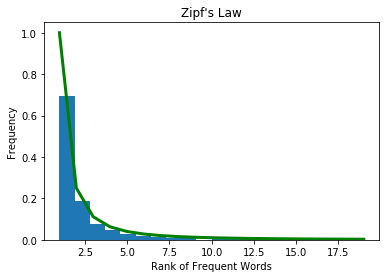

In [10]:
n = 100000
frequency = {key:value for key,value in frequency.items()[0:n]}

#convert value of frequency to numpy array
s = frequency.values()
s = np.array(s)

#Calculate zipf and plot the data
a = 2. #  distribution parameter
count, bins, ignored = plt.hist(s[s<20],20, normed=True)
x = np.arange(1., 20.)

y = x**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=3, color='g')
plt.title("Zipf's Law")
plt.ylabel("Frequency")
plt.xlabel("Rank of Frequent Words")
plt.show()

In [11]:
#Zipf's Law using data from abstracts.wiki.txt

#count term frequency
words = set(text)

term_frequency=[]
terms=[]
for w in words:
    terms.append(w)
    term_frequency.append(text.count(w))

# # sort Frequency based on the biggest value
tf = {'Term': terms, 'Frequency': term_frequency}
data_frame = pd.DataFrame(data=tf)
values = data_frame.sort_values(by=['Frequency'], ascending = False)

i = 1
rank = []
for w in values['Frequency']:
    rank.append(i)
    i+=1
values['Rank'] = rank
values['Rank*Frequency'] = values['Rank'] * values['Frequency']

In [12]:
#Show the top 20 unique terms
values = values.head(20)
values

,Frequency,Term,Rank,Rank*Frequency
2010,1661,the,1,1661
5950,1262,of,2,2524
2651,791,a,3,2373
3696,652,is,4,2608
5751,640,and,5,3200
3701,630,in,6,3780
5210,457,to,7,3199
5954,367,or,8,2936
3483,331,quot,9,2979
816,287,an,10,2870


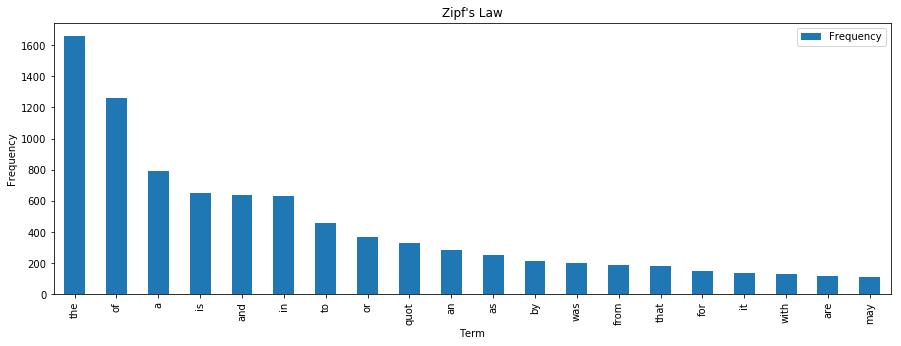

In [13]:
plot  = values[['Term', 'Frequency']].plot(kind='bar', title ="Zipf's Law", figsize=(15, 5), legend=True)
plot.set_xlabel("Term")
plot.set_ylabel("Frequency")
plot.set_xticklabels(labels = values['Term'], fontdict = {})
plt.show()

### Benford's  Law

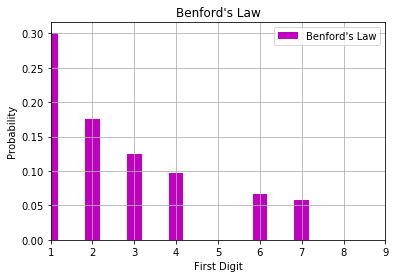

In [14]:
#Benford's Law using first digit of frequency
# set the width of the bars
width = 0.35

first_digit = []

for n in values['Frequency']:
    first_digit.append(int(str(n)[0]) )
probability = [np.log10(1 + (1.0 / d)) for d in first_digit]

plt.bar(first_digit, probability, width, color='m', label="Benford's Law")

# limit the  number of bars
plt.xlim(1, 9)
plt.title("Benford's Law")
plt.ylabel("Probability")
plt.xlabel("First Digit")
plt.grid(True)
plt.legend()
plt.show()

In [15]:
values['First Digit'] = first_digit
values['Probability'] = probability
values

,Frequency,Term,Rank,Rank*Frequency,First Digit,Probability
2010,1661,the,1,1661,1,0.301030
5950,1262,of,2,2524,1,0.301030
2651,791,a,3,2373,7,0.057992
3696,652,is,4,2608,6,0.066947
5751,640,and,5,3200,6,0.066947
3701,630,in,6,3780,6,0.066947
5210,457,to,7,3199,4,0.096910
5954,367,or,8,2936,3,0.124939
3483,331,quot,9,2979,3,0.124939
816,287,an,10,2870,2,0.176091


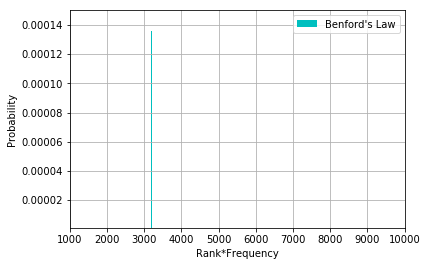

In [16]:
#Benford's Law using rank*frequency
# set the width of the bars
width = 0.5

rf = []

for n in values['Rank*Frequency']:
    rf.append(n)
probability = [np.log10(1 + (1.0 / d)) for d in rf]

plt.bar(rf, probability, width, color='c', label="Benford's Law")

# limit the  number of bars
plt.xlim(1000, 10000)
plt.ylim(0.000001,0.000150)
plt.ylabel("Probability")
plt.xlabel("Rank*Frequency")
plt.grid(True)
plt.legend()
plt.show()

In [17]:
values['Rank*Frequency'] = values['Rank'] * values['Frequency']
values['Probability'] = probability
values

,Frequency,Term,Rank,Rank*Frequency,First Digit,Probability
2010,1661,the,1,1661,1,0.000261
5950,1262,of,2,2524,1,0.000172
2651,791,a,3,2373,7,0.000183
3696,652,is,4,2608,6,0.000166
5751,640,and,5,3200,6,0.000136
3701,630,in,6,3780,6,0.000115
5210,457,to,7,3199,4,0.000136
5954,367,or,8,2936,3,0.000148
3483,331,quot,9,2979,3,0.000146
816,287,an,10,2870,2,0.000151


### Heap's Law

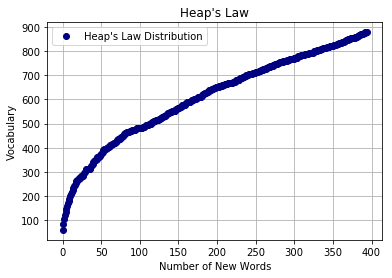

In [23]:
# Function for Heaps law
# Dictionary growth: v(n)= K*n^B
# n= number of new words
# K= Coefisien
# n= numbers of words rad
# B= Coefisien

text = []
for i in data[:10]:
    
    # tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    
    for token in tokens:
        text.append(token)

K = 60
B = 0.5
v = []  
uniq = set()

for i, token in enumerate(text):
    uniq.add(token)
    n=len(uniq)
    v.append(K*n**B)

new_words = [n for n in xrange(0, len(v))]
plt.plot(new_words, v, 'ro', label = "Heap's Law Distribution", c='navy')
plt.title("Heap's Law")
plt.ylabel("Vocabulary")
plt.xlabel("Number of New Words")
plt.grid(True)
plt.legend()
plt.show()